In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("L9_COMBO.xlsx")

final_merged_df = df.groupby('Stock Code', as_index=False)['ZSCORE_FINAL'].mean()

final_merged_df.head(40)

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)



In [3]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2015-03-31")
end_date = pd.to_datetime("2018-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False) 





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['ACLGATI', 'ASHOKA', 'BAJAJHIND', 'BAJAJHLDNG', 'DHANI', 'GOCLCORP', 'HLVLTD', 'HONAUT', 'IL&FSTRANS', 'IRB', 'JUBLPHARMA', 'KIRLOSIND', 'MOTILALOFS', 'NAUKRI', 'PEL', 'PFIZER', 'RPOWER', 'SAMMAANCAP', 'SECURKLOUD', 'THOMASCOOK', 'TORNTPHARM', 'ZEEMEDIA']


C:\Users\meets\AppData\Local\Temp\ipykernel_3928\2792880585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
C:\Users\meets\AppData\Local\Temp\ipykernel_3928\2792880585.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])


,Date,ACLGATI,ASHOKA,BAJAJHIND,BAJAJHLDNG,DHANI,GOCLCORP,HLVLTD,HONAUT,IL&FSTRANS,...,MOTILALOFS,NAUKRI,PEL,PFIZER,RPOWER,SAMMAANCAP,SECURKLOUD,THOMASCOOK,TORNTPHARM,ZEEMEDIA
0,2015-04-01,0.038097,0.044776,0.010381,0.002816,0.065714,0.083333,0.018767,0.005791,0.013378,...,0.057910,-0.001965,0.008726,-0.006121,0.014159,0.027872,0.002061,0.007916,0.031849,0.031073
1,2015-04-06,0.019795,0.030204,0.047945,-0.007193,0.026810,-0.002502,0.018421,0.003948,-0.008886,...,0.037383,0.005249,0.007057,0.042680,-0.011344,0.000174,0.068076,0.013089,0.039900,0.013699
2,2015-04-07,0.037514,0.007924,0.000000,0.019759,-0.011749,0.007210,-0.007752,-0.015094,0.014088,...,0.014157,0.000831,0.017915,0.032301,0.021183,-0.022317,0.030292,-0.013390,-0.002413,0.029730
3,2015-04-08,0.020811,-0.002358,0.120915,-0.001292,0.011889,0.029879,0.020833,0.009857,-0.010609,...,-0.004442,-0.021581,0.000444,-0.011212,0.004322,-0.005528,-0.005778,0.010714,0.018223,-0.013123
4,2015-04-09,-0.012356,0.008274,-0.020408,-0.010614,-0.011749,0.014808,0.002551,0.006041,-0.007914,...,0.001275,-0.019209,0.014040,-0.015367,0.005164,0.042589,0.091966,0.093051,-0.020589,0.079787


In [4]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()



# Step 1: Initial weights from Z-score
final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()

# Step 2: Cap and redistribute iteratively
cap = 0.07
weights = final_df['PORTFOLIO_WEIGHTS'].copy()

while True:
    over_cap = weights > cap
    if not over_cap.any():
        break  # Exit loop if no weights are over the cap

    # Cap the overweight stocks
    weights[over_cap] = cap

    # Redistribute the excess weight
    total_weight = weights.sum()
    excess = 1.0 - total_weight

    # Identify stocks eligible to receive excess (not capped)
    under_cap = weights < cap
    allocatable = weights[under_cap]
    scaling_sum = allocatable.sum()

    if scaling_sum == 0:
        break  # Avoid divide by zero

    # Distribute excess proportionally
    weights[under_cap] += (allocatable / scaling_sum) * excess

final_df['PORTFOLIO_WEIGHTS'] = weights

# Final checks (optional)
print("Max weight:", final_df['PORTFOLIO_WEIGHTS'].max())  # Should be <= 0.07
print("Total weight:", final_df['PORTFOLIO_WEIGHTS'].sum())  # Should be ~1.0


final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)


final_df.to_csv("L9_COMBO_OP_NEW.csv",index=False)

Max weight: 0.07
Total weight: 1.0000000000000002


C:\Users\meets\AppData\Local\Temp\ipykernel_3928\1467310071.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()
C:\Users\meets\AppData\Local\Temp\ipykernel_3928\1467310071.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = weights


In [5]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              742 non-null    datetime64[ns]
 1   Portfolio Return  742 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [6]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("L9_COMBO_FINAL_NEW.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2015-04-01   2015-04-01
End Period                 2018-04-02   2018-04-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          29.38%       104.6%
CAGR﹪                     6.1%         17.87%

Sharpe                     0.7          1.31
Prob. Sharpe Ratio         88.07%       98.37%
Smart Sharpe               0.61         1.13
Sortino                    0.94         1.77
Smart Sortino              0.81         1.53
Sortino/√2                 0.67         1.25
Smart Sortino/√2           0.58         1.08
Omega                      1.26         1.26

Max Drawdown               -20.37%      -21.02%
Longest DD Days            465          180
Volatility (ann.)          13.82%       20.06%
R^2                        0.66         0.66
Information Ratio          0.09         0.09
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2016-01-07,2016-02-29,2016-07-04,180,-21.024467,-20.874321
2,2018-01-09,2018-03-26,2018-04-02,84,-17.898590,-17.890559
3,2016-10-24,2016-11-22,2017-03-10,138,-17.291621,-17.276519
4,2015-04-15,2015-06-11,2015-07-17,94,-12.150782,-12.093384
5,2015-08-07,2015-08-24,2015-10-01,56,-11.819243,-10.974440


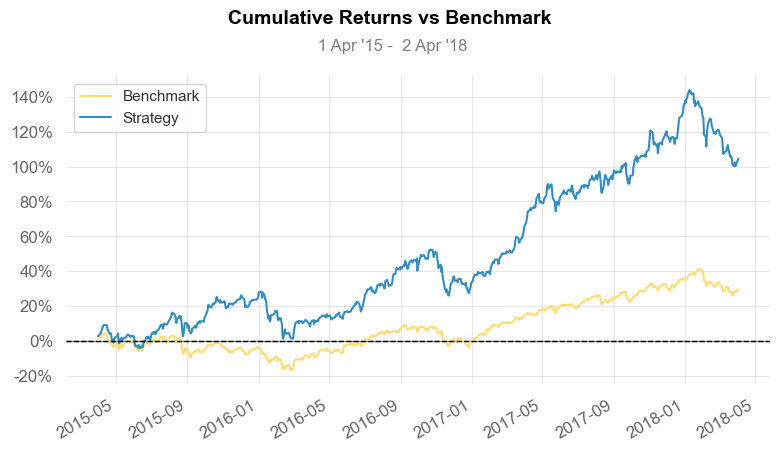

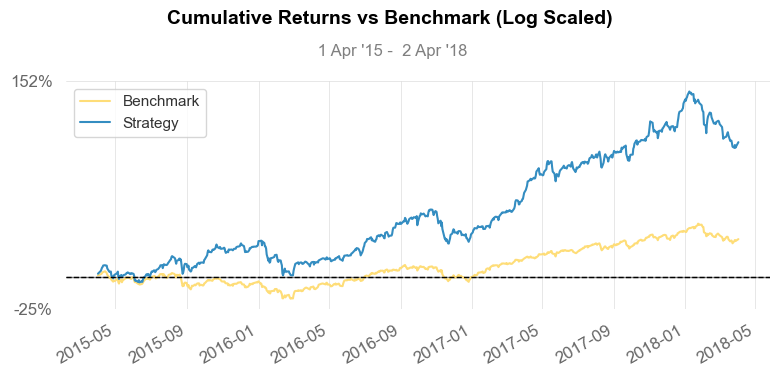

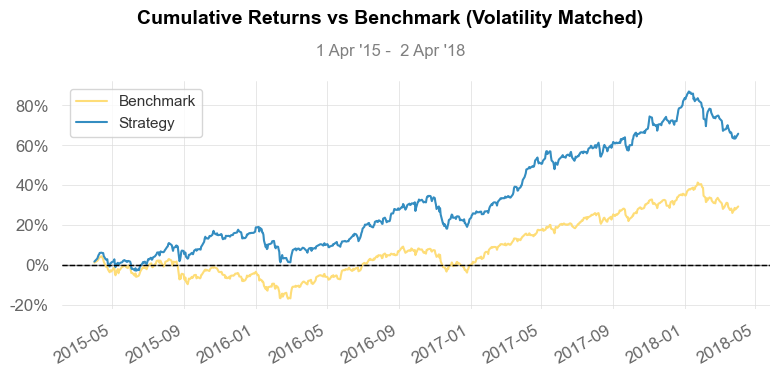

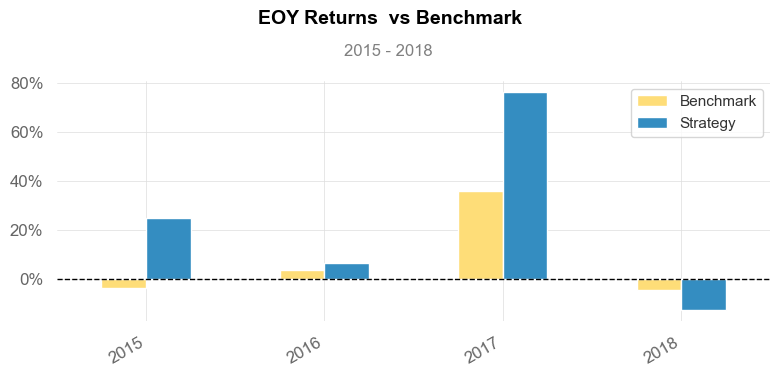

OptionError: No such keys(s): 'mode.use_inf_as_null'

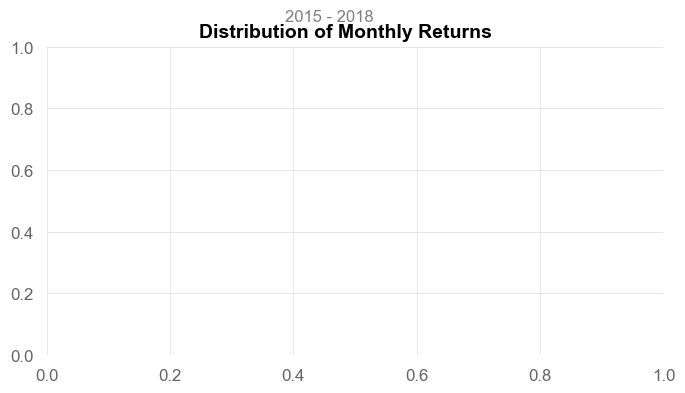

In [7]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")